In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ucitavanje dataset-a
file_path = 'euro2024_players.csv'
df = pd.read_csv(file_path)

In [2]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [3]:
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [5]:
# Funkcija za formatiranje vrednosti igraca
def format_market_value(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    return str(value)

# primena na kolonu MarketValue
df['MarketValueFormatted'] = df['MarketValue'].apply(format_market_value)

print(df[['Name', 'MarketValue', 'MarketValueFormatted']].head())


                    Name  MarketValue MarketValueFormatted
0  Marc-André ter Stegen     28000000                28.0M
1           Manuel Neuer      4000000                 4.0M
2         Oliver Baumann      3000000                 3.0M
3     Nico Schlotterbeck     40000000                40.0M
4           Jonathan Tah     30000000                30.0M


In [6]:
# ciscenje skupa, nedostajuce vrednosti u koloni Foot
df_cleaned = df.dropna(subset=['Foot'])

remaining_players = df_cleaned.shape[0]
print(f"Broj igrača nakon uklanjanja onih sa null vrednostima u 'Foot': {remaining_players}")



Broj igrača nakon uklanjanja onih sa null vrednostima u 'Foot': 620


In [7]:
# Postavljanje stila za vizualizacije
sns.set(style="whitegrid")

<ipython-input-11-325ea638518d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette="viridis")


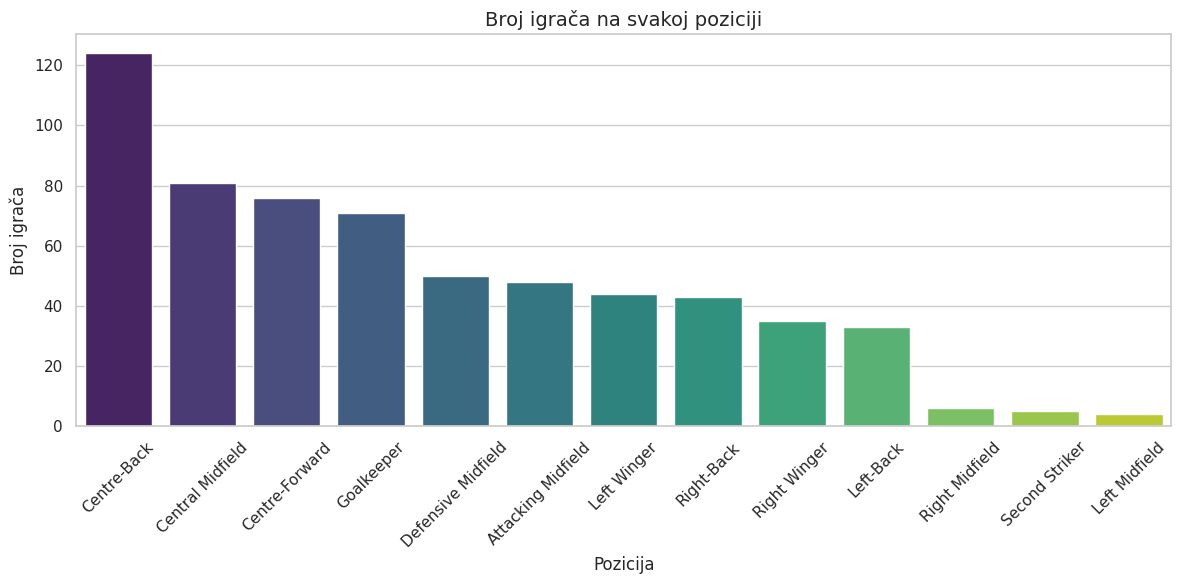

In [11]:
# 1. Broj igraca na svakoj poziciji
position_counts = df_cleaned['Position'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette="viridis")
plt.title("Broj igrača na svakoj poziciji", fontsize=14)
plt.xlabel("Pozicija", fontsize=12)
plt.ylabel("Broj igrača", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


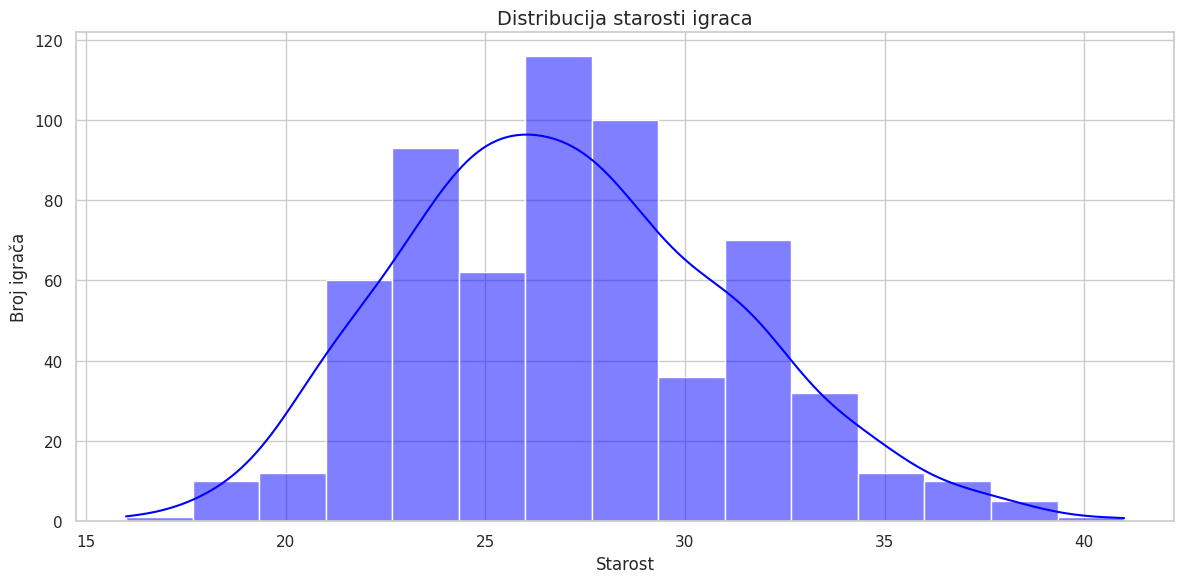

In [20]:
# 2. Analiza starosti igraca
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=15, color='blue')
plt.title("Distribucija starosti igraca", fontsize=14)
plt.xlabel("Starost", fontsize=12)
plt.ylabel("Broj igrača", fontsize=12)
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x7a3dcb5931f0>,
 [Text(-0.6649995817687755, 0.876228027540408, 'right'),
  Text(0.5189995316853492, -0.9698657051934502, 'left'),
  Text(1.0863254513449758, -0.17290752950677063, 'both')],
 [Text(-0.36272704460115024, 0.4779425604765861, '70.66%'),
  Text(0.28309065364655406, -0.5290176573782455, '24.31%'),
  Text(0.5925411552790777, -0.09431319791278396, '5.02%')])

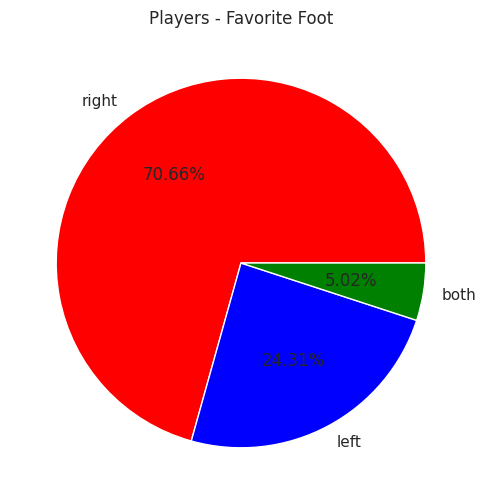

In [21]:
# 3. Analiza preferirane noge
right = df_cleaned['Foot'].value_counts()['right']
left = df_cleaned['Foot'].value_counts()['left']
both = df_cleaned['Foot'].value_counts()['both']
values = [right, left, both]
labels = ['right', 'left', 'both']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (10 ,6))
plt.title('Players - Favorite Foot')
plt.pie(values, labels = labels, autopct = '%1.2f%%', colors = colors)



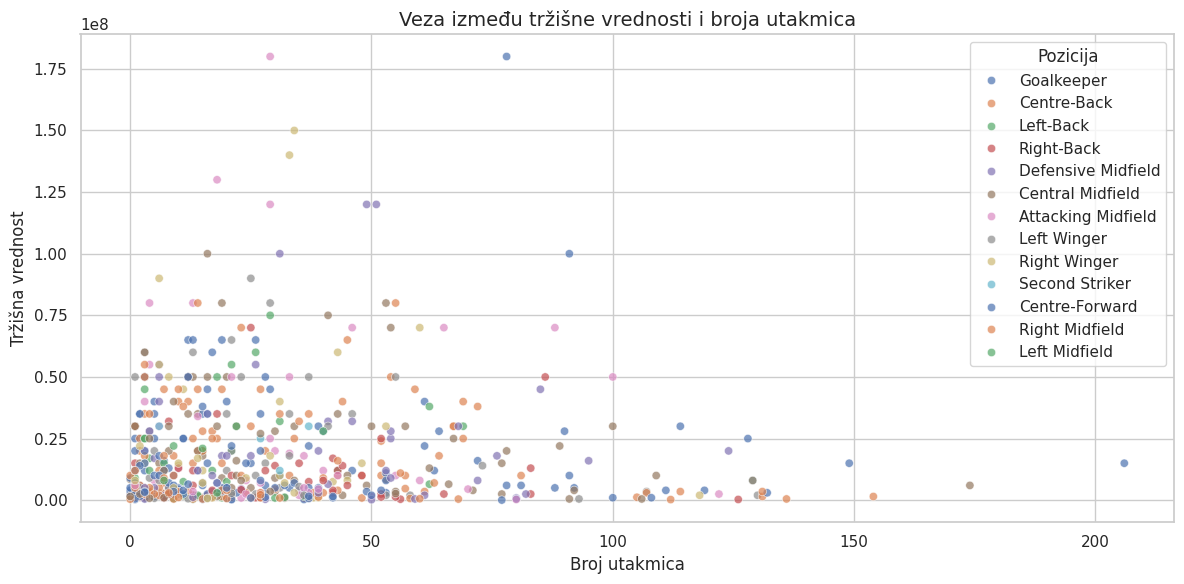

In [31]:
# 4. Veza izmedju trzisne vrednosti i broja utakmica
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='Caps', y='MarketValue', hue='Position', palette="deep", alpha=0.7)
plt.title("Veza između tržišne vrednosti i broja utakmica", fontsize=14)
plt.xlabel("Broj utakmica", fontsize=12)
plt.ylabel("Tržišna vrednost", fontsize=12)
plt.legend(title="Pozicija")
plt.tight_layout()
plt.show()

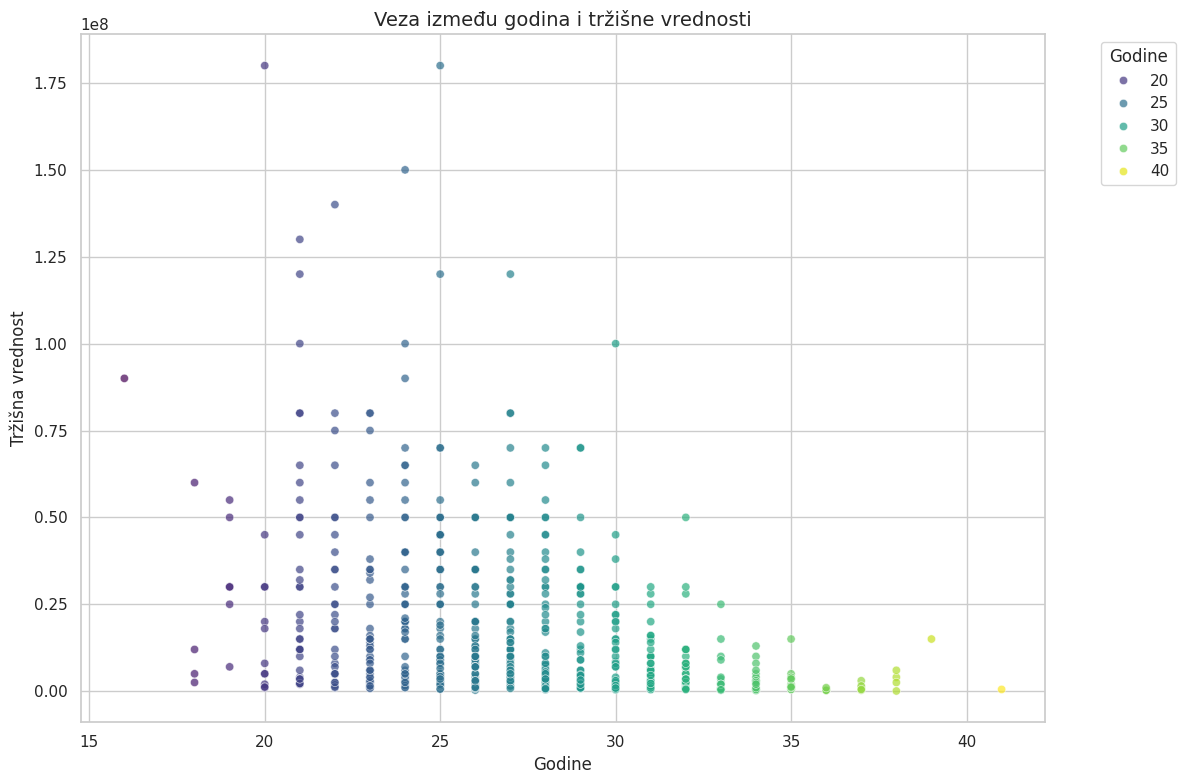

In [32]:
# 5. Veza visine igraca sa trzisnom vrednoscu
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='Age', y='MarketValue', hue='Age', palette="viridis", alpha=0.7)
plt.title("Veza između godina i tržišne vrednosti", fontsize=14)
plt.xlabel("Godine", fontsize=12)
plt.ylabel("Tržišna vrednost", fontsize=12)
plt.legend(title="Godine", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

analiza pozicija sa najvisim vrednostima

                      mean      max
Position                           
Attacking Midfield  28.94M  180.00M
Right Winger        26.69M  150.00M
Defensive Midfield  21.90M  120.00M
Second Striker      21.00M   30.00M
Left Winger         20.68M   90.00M
Left-Back           20.18M   75.00M
Central Midfield    19.83M  100.00M
Centre-Forward      19.41M  180.00M
Centre-Back         15.50M   80.00M
Right Midfield      15.27M   50.00M
Goalkeeper          10.93M   40.00M
Right-Back          10.65M   70.00M
Left Midfield        8.38M   12.00M


<ipython-input-34-b90c47056b5d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


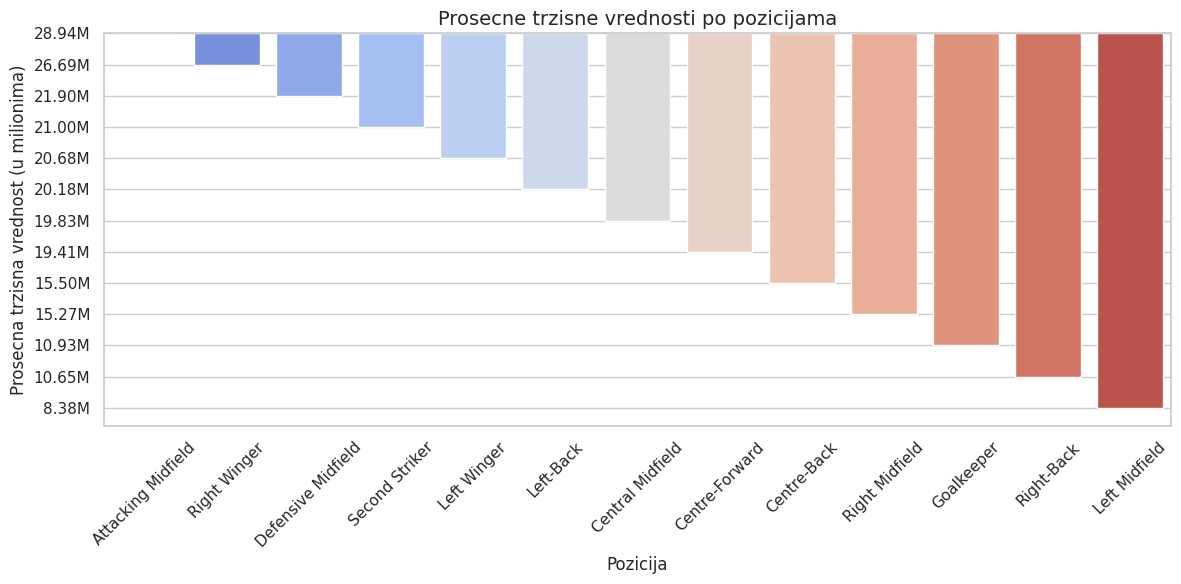

In [34]:
# Grupisanje podataka prema poziciji i izracunavanje prosecne i maksimalne trzisne vrednosti
position_market_values = df_cleaned.groupby('Position')['MarketValue'].agg(['mean', 'max']).sort_values(by='mean', ascending=False)
position_market_values['mean'] = position_market_values['mean'].apply(lambda x: f"{x / 1_000_000:.2f}M")
position_market_values['max'] = position_market_values['max'].apply(lambda x: f"{x / 1_000_000:.2f}M")

print(position_market_values)

plt.figure(figsize=(12, 6))

# Reset indeks za rad sa DataFrame-om i osiguranje da koristimo numericke vrednosti
position_market_values_reset = position_market_values.reset_index()

sns.barplot(
    data=position_market_values_reset,
    x='Position',
    y='mean',
    palette="coolwarm",
    errorbar=None,

)

plt.title("Prosecne trzisne vrednosti po pozicijama", fontsize=14)
plt.xlabel("Pozicija", fontsize=12)
plt.ylabel("Prosecna trzisna vrednost (u milionima)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


analiza izmedju godina i pozicija

<ipython-input-35-14109f4d33b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Position', y='Age', palette="coolwarm")


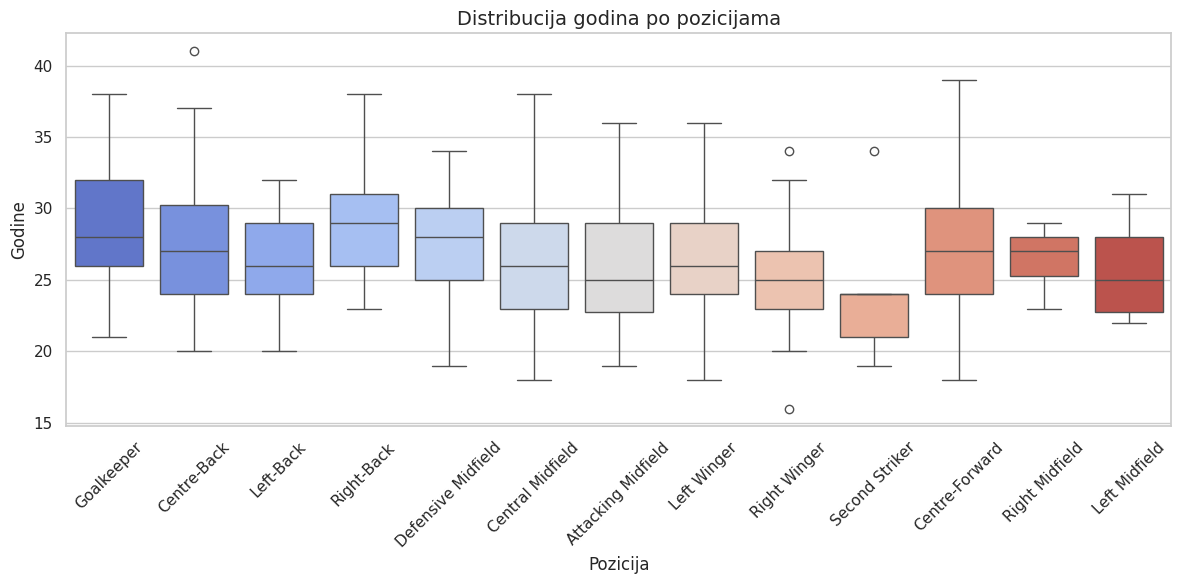

<ipython-input-35-14109f4d33b1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_cleaned, x='Position', y='Age', palette="viridis", alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


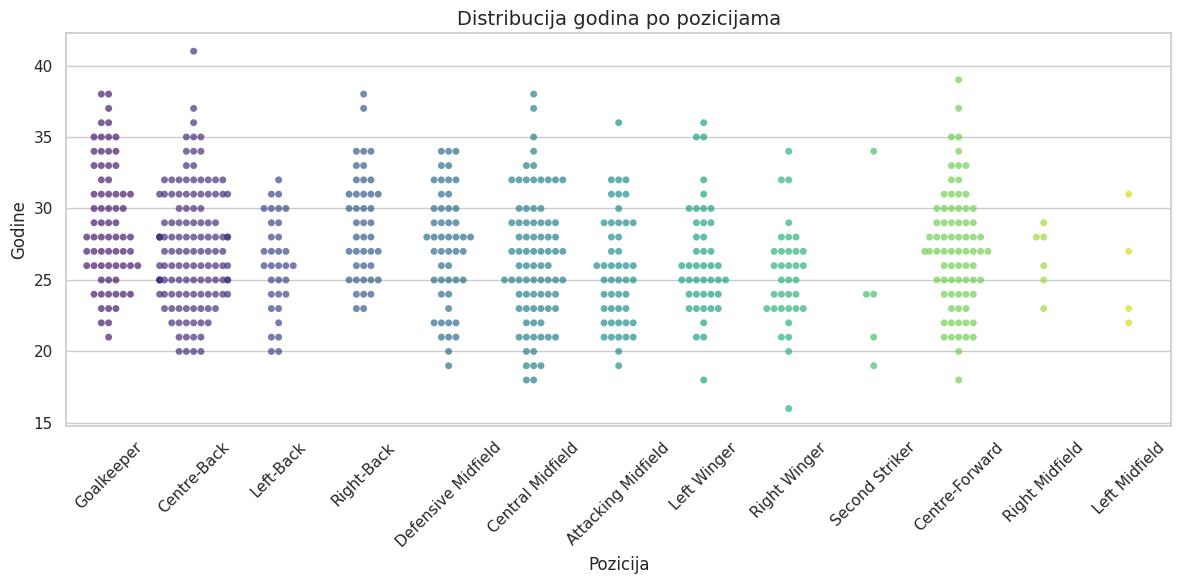

In [35]:
# Boxplot za analizu veze izmedju godina i pozicija
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Position', y='Age', palette="coolwarm")
plt.title("Distribucija godina po pozicijama", fontsize=14)
plt.xlabel("Pozicija", fontsize=12)
plt.ylabel("Godine", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Swarmplot za detaljniji prikaz
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df_cleaned, x='Position', y='Age', palette="viridis", alpha=0.7)
plt.title("Distribucija godina po pozicijama", fontsize=14)
plt.xlabel("Pozicija", fontsize=12)
plt.ylabel("Godine", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


analiza mladih igraca

                   Name  Age            Position                 Club  \
126        Lamine Yamal   16        Right Winger         FC Barcelona   
405  Warren Zaïre-Emery   18    Central Midfield  Paris Saint-Germain   
461           Leo Sauer   18         Left Winger  Feyenoord Rotterdam   
542      Semih Kılıçsoy   18      Centre-Forward          Besiktas JK   
557       Gabriel Sigua   18    Central Midfield        FC Basel 1893   
541        Kenan Yıldız   19      Second Striker          Juventus FC   
248       Kobbie Mainoo   19    Central Midfield    Manchester United   
535          Arda Güler   19  Attacking Midfield          Real Madrid   
429    Arthur Vermeeren   19    Central Midfield   Atlético de Madrid   
583          João Neves   19  Defensive Midfield           SL Benfica   

     MarketValue  
126     90000000  
405     60000000  
461      5000000  
542     12000000  
557      2500000  
541     30000000  
248     50000000  
535     30000000  
429     25000000  
583   

<ipython-input-36-bf85ffb109ea>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=youngest_players, x='Name', y='Age', palette="coolwarm")


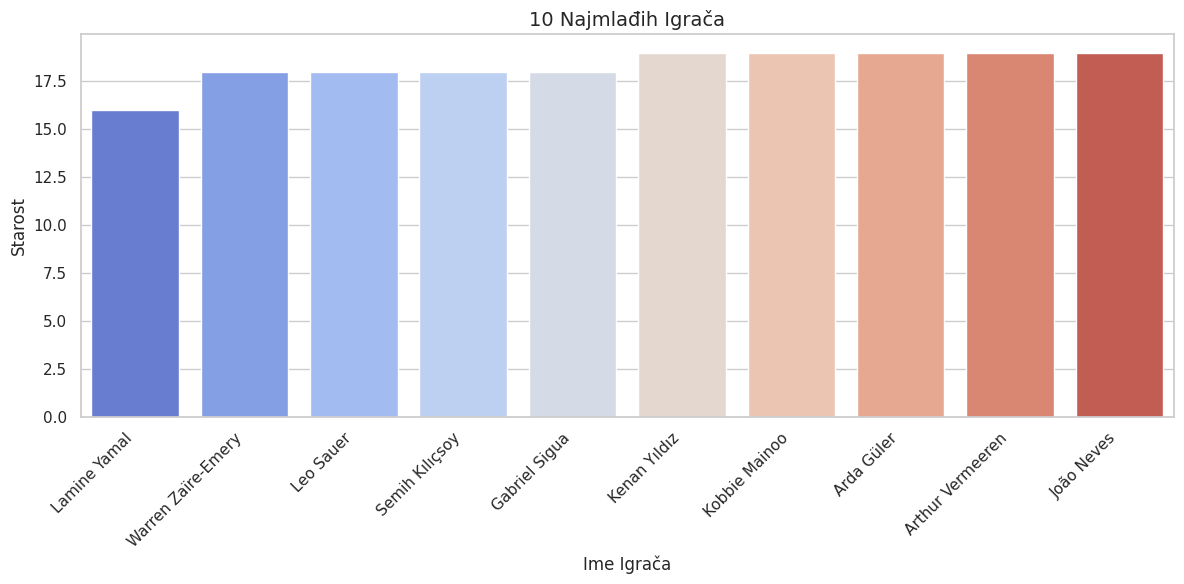

In [36]:
# Sortiranje podataka po starosti i uzimanje 10 najmladjih igraca
youngest_players = df_cleaned.sort_values(by='Age', ascending=True).head(10)

print(youngest_players[['Name', 'Age', 'Position', 'Club', 'MarketValue']])


plt.figure(figsize=(12, 6))
sns.barplot(data=youngest_players, x='Name', y='Age', palette="coolwarm")
plt.title("10 Najmlađih Igrača", fontsize=14)
plt.xlabel("Ime Igrača", fontsize=12)
plt.ylabel("Starost", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


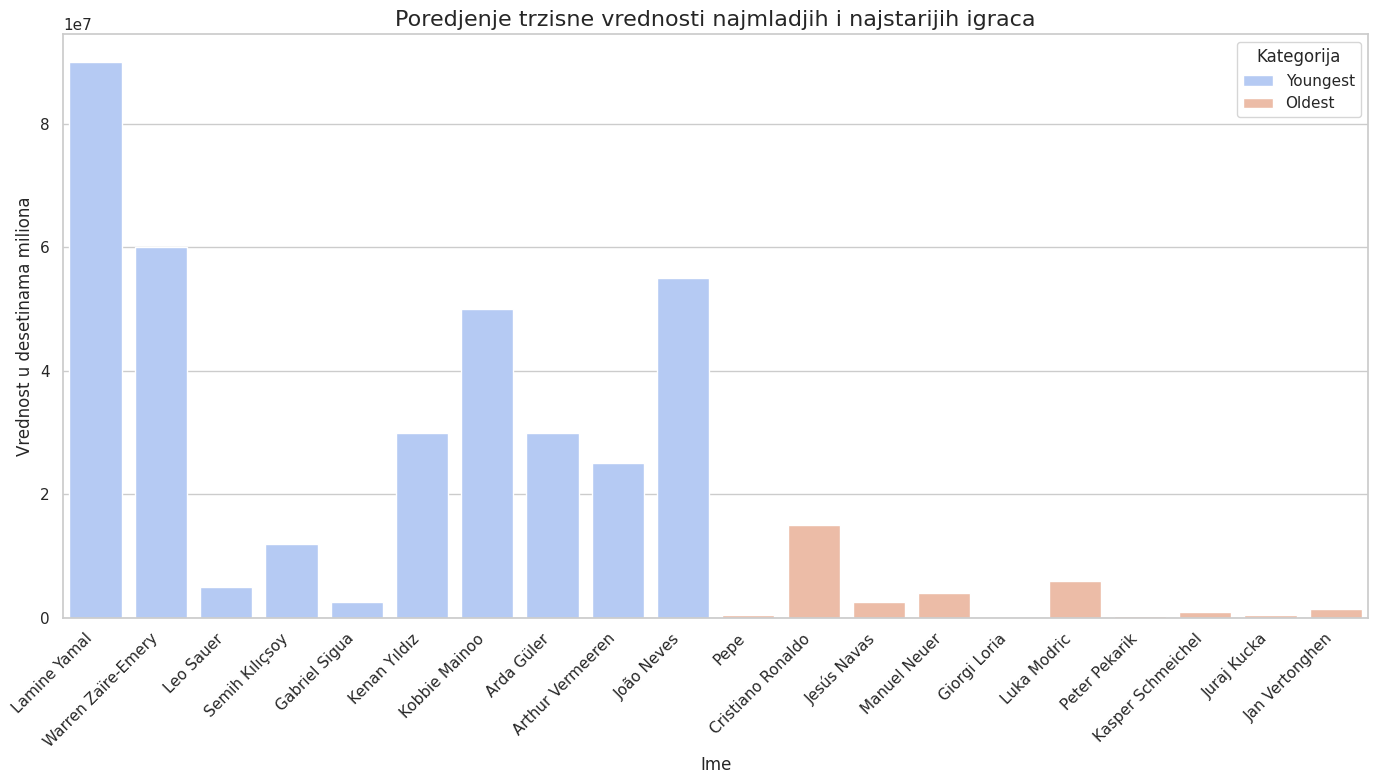

Najmladji igraci:
                   Name  Age            Position  MarketValue
126        Lamine Yamal   16        Right Winger     90000000
405  Warren Zaïre-Emery   18    Central Midfield     60000000
461           Leo Sauer   18         Left Winger      5000000
542      Semih Kılıçsoy   18      Centre-Forward     12000000
557       Gabriel Sigua   18    Central Midfield      2500000
541        Kenan Yıldız   19      Second Striker     30000000
248       Kobbie Mainoo   19    Central Midfield     50000000
535          Arda Güler   19  Attacking Midfield     30000000
429    Arthur Vermeeren   19    Central Midfield     25000000
583          João Neves   19  Defensive Midfield     55000000

Najstariji igraci:
                  Name  Age          Position  MarketValue
577               Pepe   41       Centre-Back       500000
596  Cristiano Ronaldo   39    Centre-Forward     15000000
114        Jesús Navas   38        Right-Back      2500000
1         Manuel Neuer   38        Goalkeepe

In [37]:
# Analiza najmladjih i najstarijih igraca i poredejnja

youngest_players = df_cleaned.sort_values(by='Age', ascending=True).head(10)
oldest_players = df_cleaned.sort_values(by='Age', ascending=False).head(10)

# Kombinovanje mladih i starijih za poredjenje trzisne vrednosti
comparison = pd.concat([
    youngest_players.assign(Category='Youngest'),
    oldest_players.assign(Category='Oldest')
])

plt.figure(figsize=(14, 8))
sns.barplot(data=comparison, x='Name', y='MarketValue', hue='Category', palette="coolwarm")
plt.title("Poredjenje trzisne vrednosti najmladjih i najstarijih igraca", fontsize=16)
plt.xlabel("Ime", fontsize=12)
plt.ylabel("Vrednost u desetinama miliona", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kategorija", loc="upper right")
plt.tight_layout()
plt.show()

print("Najmladji igraci:")
print(youngest_players[['Name', 'Age', 'Position', 'MarketValue']])
print("\nNajstariji igraci:")
print(oldest_players[['Name', 'Age', 'Position', 'MarketValue']])


<ipython-input-38-1db46a456e67>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
<ipython-input-38-1db46a456e67>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  team_age_analysis = df_cleaned.groupby(['Country', 'AgeGroup']).size().unstack(fill_value=0)


AgeGroup        15-20  21-25  26-30  31-35  36-40  41+
Country                                               
Albania             0      6     12      7      1    0
Austria             0      9      8      7      1    0
Belgium             1      9      6      6      2    0
Croatia             0      7     12      4      3    0
Czech Republic      0     11     13      2      0    0
Denmark             0      6     12      6      2    0
England             1      8     11      6      0    0
France              1      4     14      5      1    0
Georgia             1      9      9      5      2    0
Germany             0      6     11      8      1    0
Hungary             0      9      8      9      0    0
Italy               0      6     16      4      0    0
Netherlands         0      8     11      7      0    0
Poland              1      6     12      6      2    0
Portugal            1     10      8      4      2    1
Romania             0      5     14      5      1    0
Scotland  

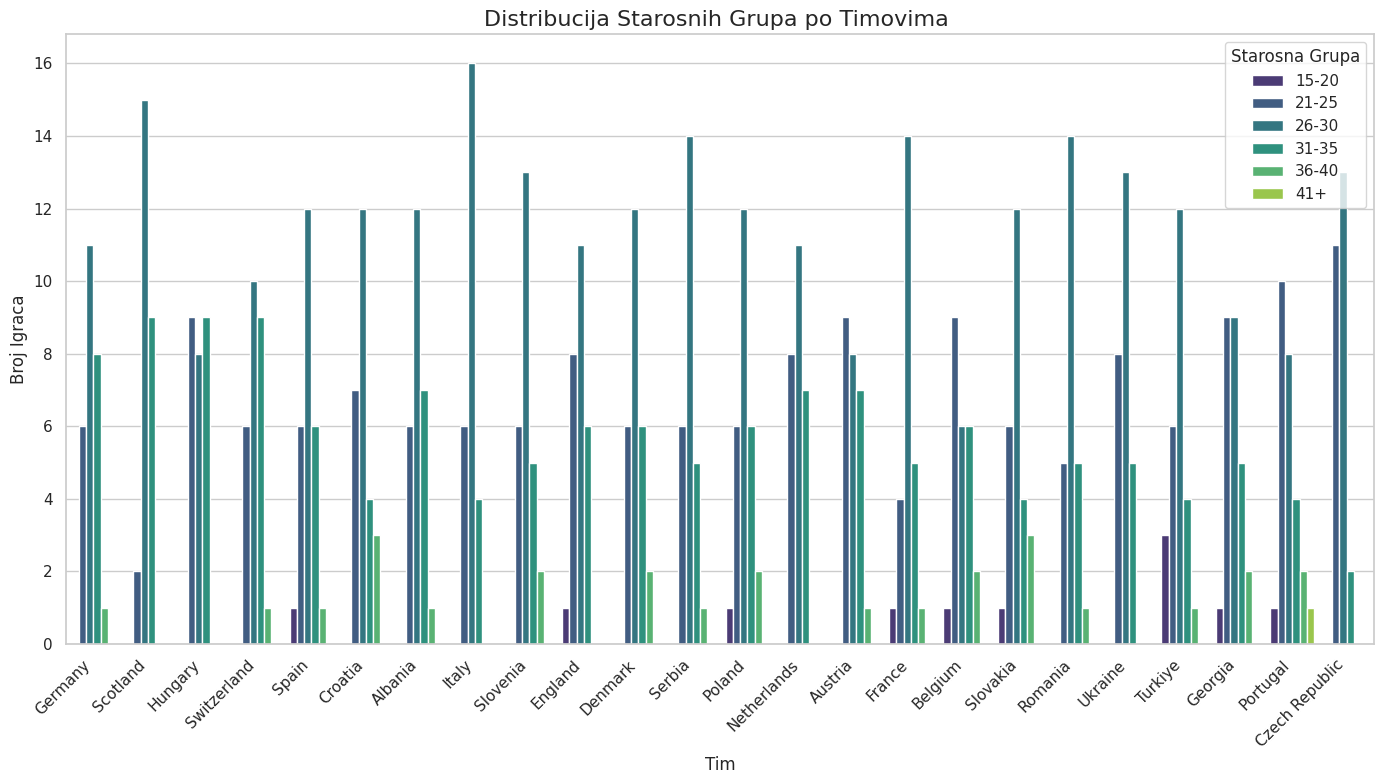

In [38]:
# Analiza starosnih grupa i timova

# Definisanje starosnih grupa
bins = [15, 20, 25, 30, 35, 40, 50]
labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41+']
df_cleaned['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

team_age_analysis = df_cleaned.groupby(['Country', 'AgeGroup']).size().unstack(fill_value=0)

print(team_age_analysis)


top_teams = df_cleaned['Country'].value_counts().head(24).index
filtered_data = df_cleaned[df_cleaned['Country'].isin(top_teams)]

plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_data, x='Country', hue='AgeGroup', palette="viridis")
plt.title("Distribucija Starosnih Grupa po Timovima ", fontsize=16)
plt.xlabel("Tim", fontsize=12)
plt.ylabel("Broj Igraca", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Starosna Grupa")
plt.tight_layout()
plt.show()


korelacija


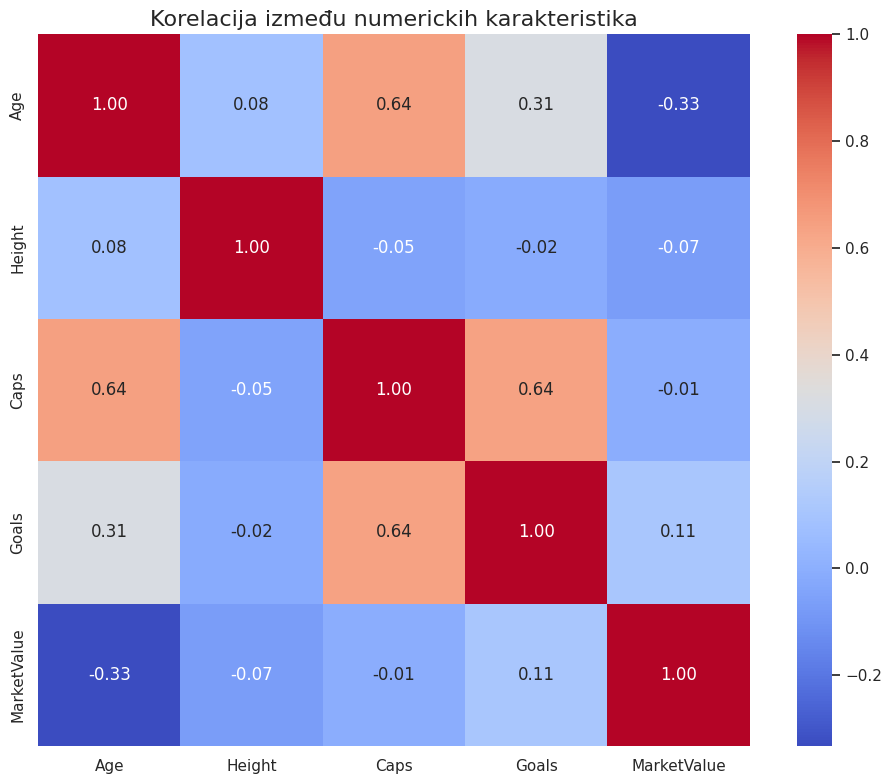

Najjace korelacije:
Caps   Age      0.644967
Age    Caps     0.644967
Goals  Caps     0.636026
Caps   Goals    0.636026
dtype: float64


In [39]:
import numpy as np

# Numericke kolone za korelaciju
numeric_columns = ['Age', 'Height', 'Caps', 'Goals', 'MarketValue']
correlation_matrix = df_cleaned[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Korelacija između numerickih karakteristika", fontsize=16)
plt.tight_layout()
plt.show()

# Ispis najjacih korelacija
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
strongest_correlations = correlation_pairs[
    (correlation_pairs != 1) & (abs(correlation_pairs) > 0.5)
]
# Ignorisu se korelacije sa sobom i slabe korelacije
print("Najjace korelacije:")
print(strongest_correlations)


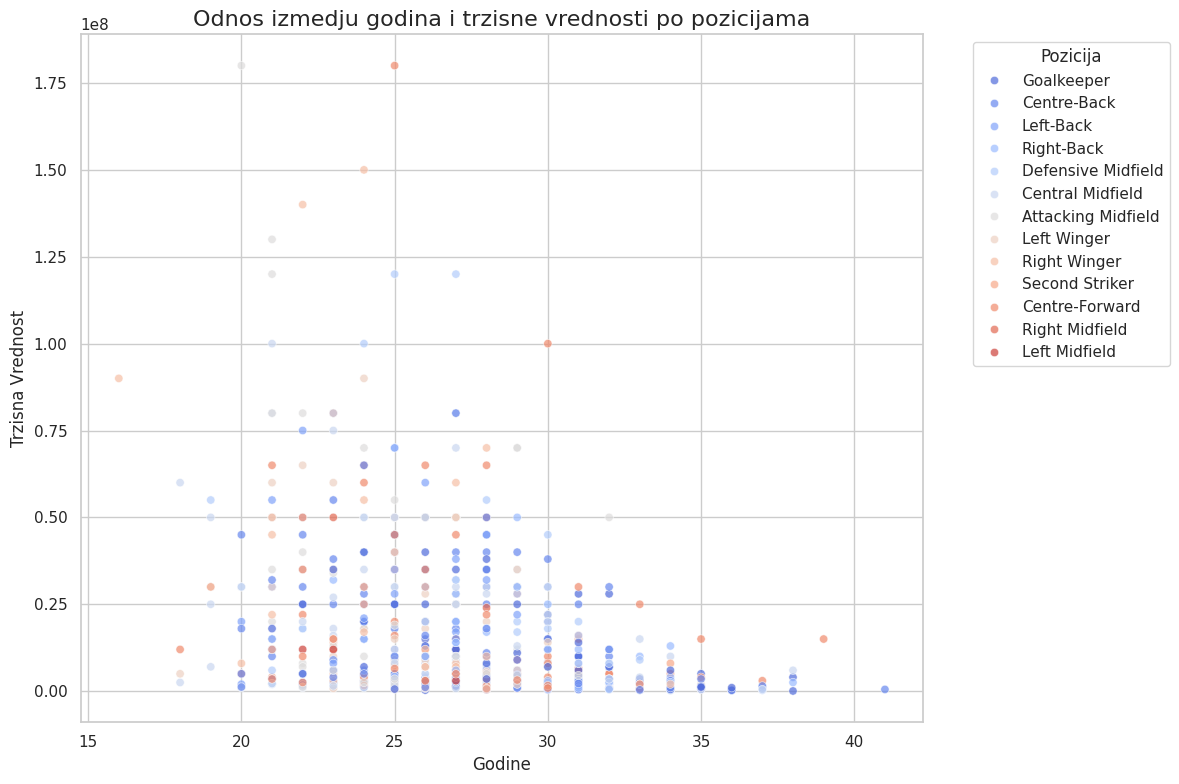

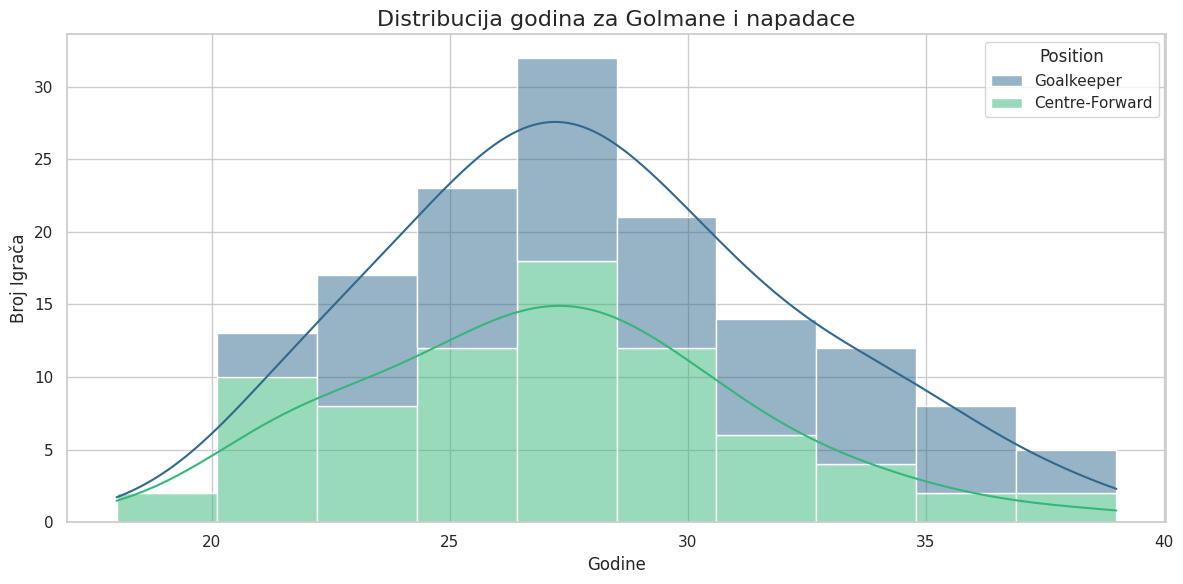

In [40]:
#Odnos izmedju godina i trzisne vrednosti po pozicijama
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='Age', y='MarketValue', hue='Position', palette="coolwarm", alpha=0.7)
plt.title("Odnos izmedju godina i trzisne vrednosti po pozicijama", fontsize=16)
plt.xlabel("Godine", fontsize=12)
plt.ylabel("Trzisna Vrednost", fontsize=12)
plt.legend(title="Pozicija", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Histogramska distribucija za specificne grupe igraca: Golmane i napadace
specific_positions = df_cleaned[df_cleaned['Position'].isin(['Goalkeeper', 'Centre-Forward'])]

plt.figure(figsize=(12, 6))
sns.histplot(data=specific_positions, x='Age', hue='Position', multiple='stack', palette="viridis", kde=True)
plt.title("Distribucija godina za Golmane i napadace", fontsize=16)
plt.xlabel("Godine", fontsize=12)
plt.ylabel("Broj Igrača", fontsize=12)
plt.tight_layout()
plt.show()




<ipython-input-41-6db046050aac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Position', y='Height', palette="coolwarm")


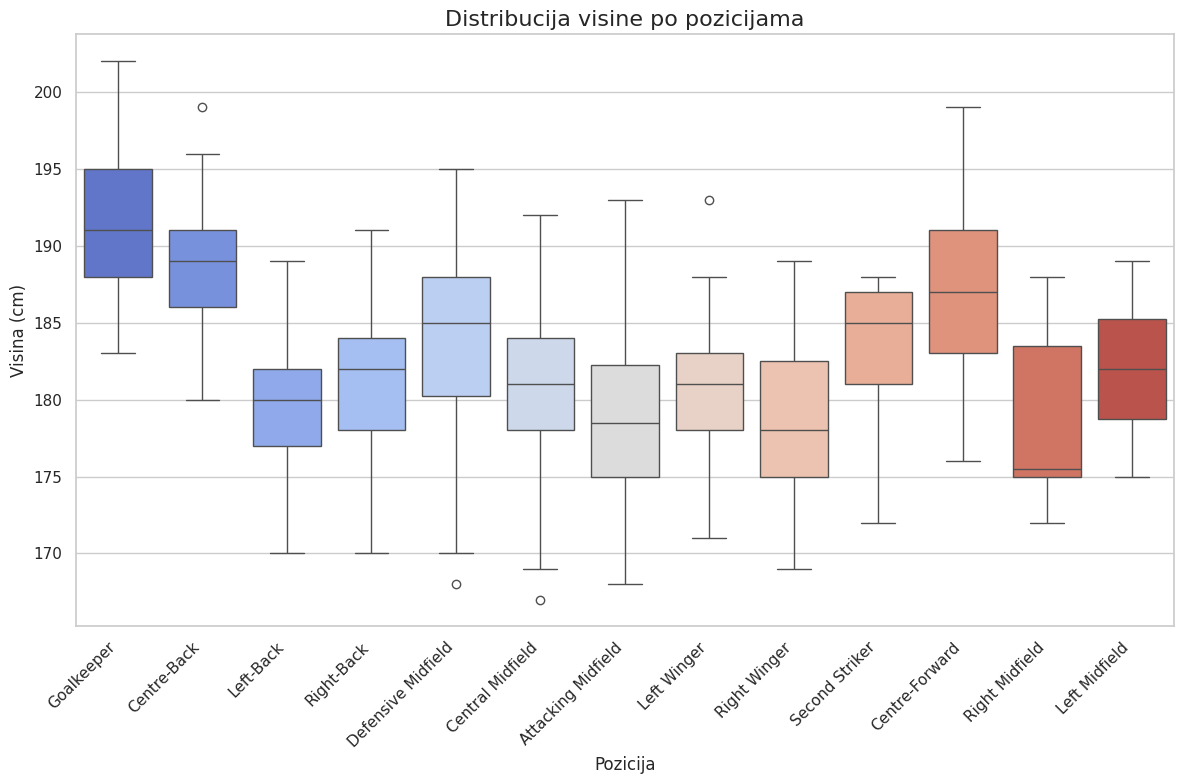

<ipython-input-41-6db046050aac>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Position', y='Age', palette="viridis")


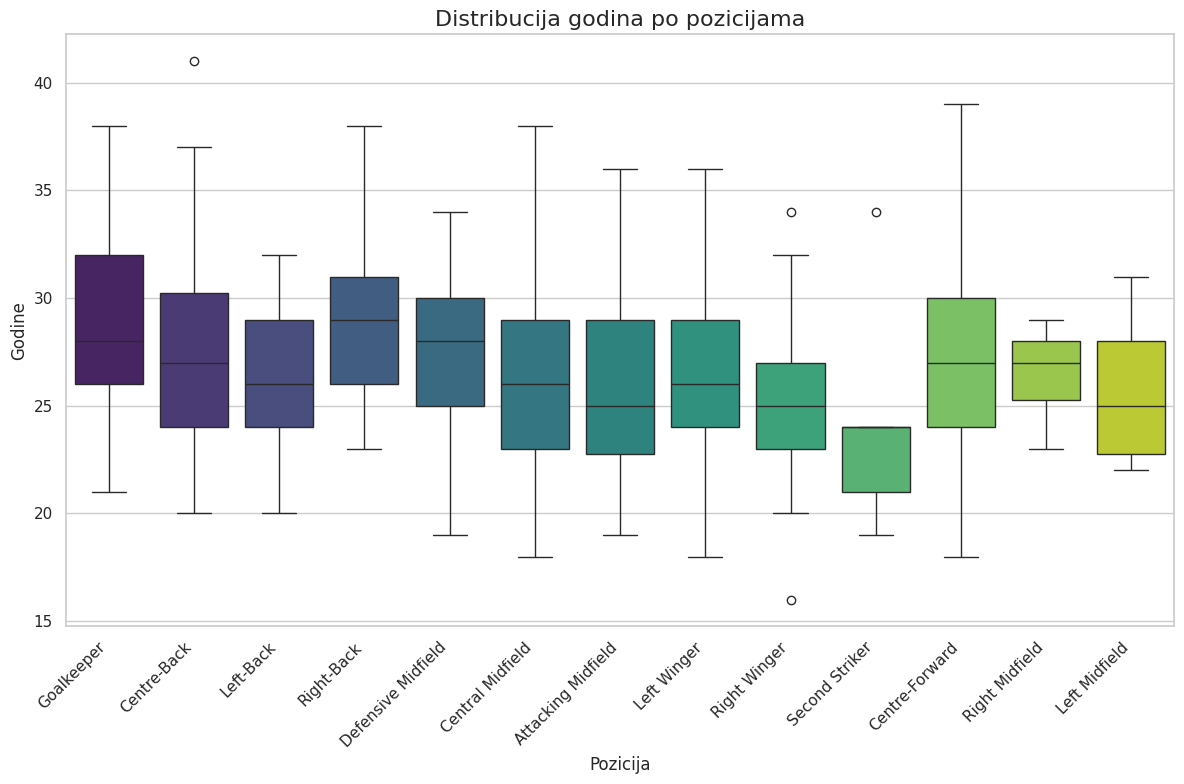

In [41]:
# Analiza povezanosti karakteristika (visina i godine) sa pozicijama

# Vizualizacija visine po pozicijama
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='Position', y='Height', palette="coolwarm")
plt.title("Distribucija visine po pozicijama", fontsize=16)
plt.xlabel("Pozicija", fontsize=12)
plt.ylabel("Visina (cm)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Vizualizacija godina po pozicijama
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='Position', y='Age', palette="viridis")
plt.title("Distribucija godina po pozicijama", fontsize=16)
plt.xlabel("Pozicija", fontsize=12)
plt.ylabel("Godine", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**Inzenjering podataka**


In [42]:
#Ciscenje podataka

df_cleaned = df.dropna(subset=['Foot'])

# Provera nedostajucih vrednosti u datasetu
missing_values = df_cleaned.isnull().sum()
print("Broj nedostajucih vrednosti po kolonama:")
print(missing_values)

df_cleaned = df_cleaned.dropna()

# Provera outliera za numericke kolone
numeric_columns = ['Age', 'Height', 'Caps', 'Goals', 'MarketValue']
for column in numeric_columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    print(f"Kolona '{column}' ima {len(outliers)} outliera.")

print("Broj redova i kolona nakon ciscenja:", df_cleaned.shape)

Broj nedostajucih vrednosti po kolonama:
Name                    0
Position                0
Age                     0
Club                    0
Height                  0
Foot                    0
Caps                    0
Goals                   0
MarketValue             0
Country                 0
MarketValueFormatted    0
dtype: int64
Kolona 'Age' ima 1 outliera.
Kolona 'Height' ima 0 outliera.
Kolona 'Caps' ima 31 outliera.
Kolona 'Goals' ima 64 outliera.
Kolona 'MarketValue' ima 41 outliera.
Broj redova i kolona nakon ciscenja: (620, 11)


Transformacija podataka

In [43]:
import numpy as np

df_cleaned['Foot'] = df_cleaned['Foot'].str.lower()

valid_foot_mapping = {'right': 0, 'left': 1, 'both': 2}
df_cleaned['Foot_Encoded'] = df_cleaned['Foot'].map(valid_foot_mapping)

# Uklanjanje redova sa vrednostima koje nisu u gore navedenom skupu
df_cleaned = df_cleaned.dropna(subset=['Foot_Encoded'])

print("Provera mapiranja za 'Foot':")
print(df_cleaned[['Foot', 'Foot_Encoded']].drop_duplicates())

print("Prvih redova nakon mapiranja za 'Foot':")
print(df_cleaned[['Name', 'Foot', 'Foot_Encoded']].head())

# Provera transformisanih podataka
print("Transformisani podaci :")
print(df_cleaned[['Name', 'Foot', 'Foot_Encoded'] + [col for col in df_cleaned.columns if 'Position_' in col]].head())


Provera mapiranja za 'Foot':
     Foot  Foot_Encoded
0   right           0.0
3    left           1.0
12   both           2.0
Prvih redova nakon mapiranja za 'Foot':
                    Name   Foot  Foot_Encoded
0  Marc-André ter Stegen  right           0.0
1           Manuel Neuer  right           0.0
2         Oliver Baumann  right           0.0
3     Nico Schlotterbeck   left           1.0
4           Jonathan Tah  right           0.0
Transformisani podaci :
                    Name   Foot  Foot_Encoded
0  Marc-André ter Stegen  right           0.0
1           Manuel Neuer  right           0.0
2         Oliver Baumann  right           0.0
3     Nico Schlotterbeck   left           1.0
4           Jonathan Tah  right           0.0


skaliranje numerickih vrednosti


In [44]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['Age', 'Height', 'Caps', 'Goals', 'MarketValue']

# Skaliranje numerickih podataka
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_columns])

# Dodavanje skaliranih kolona nazad u dataset
scaled_columns = [f"{col}_Scaled" for col in numeric_columns]
df_cleaned[scaled_columns] = scaled_data

# Provera rezultata skaliranja
print("Prvih nekoliko redova sa skaliranim numerickim kolonama:")
print(df_cleaned[['Name'] + scaled_columns].head())


Prvih nekoliko redova sa skaliranim numerickim kolonama:
                    Name  Age_Scaled  Height_Scaled  Caps_Scaled  \
0  Marc-André ter Stegen    1.198046       0.429823     0.303153   
1           Manuel Neuer    2.653630       1.340645     2.852163   
2         Oliver Baumann    1.683241       0.429823    -0.987484   
3     Nico Schlotterbeck   -0.742733       1.037038    -0.600293   
4           Jonathan Tah    0.227656       1.644252    -0.180836   

   Goals_Scaled  MarketValue_Scaled  
0     -0.413464            0.388592  
1     -0.413464           -0.598423  
2     -0.413464           -0.639549  
3     -0.413464            0.882100  
4     -0.413464            0.470844  


dodajemo nove karakteristike kao sto su efikasnost(broj golova po utakmici) i iskustvo(broj utakmica po godini starosti)

In [45]:
# Kreiranje novih karakteristika
# menjamo 0 sa NaN da izbegnemo deljenje nulom

df_cleaned['Efficiency'] = df_cleaned['Goals'] / df_cleaned['Caps'].replace(0, np.nan)


df_cleaned['Experience'] = df_cleaned['Caps'] / df_cleaned['Age']

print("Sa novim karakteristikama:")
print(df_cleaned[['Name', 'Efficiency', 'Experience']].head(20))


Sa novim karakteristikama:
                      Name  Efficiency  Experience
0    Marc-André ter Stegen    0.000000    1.250000
1             Manuel Neuer    0.000000    3.131579
2           Oliver Baumann         NaN    0.000000
3       Nico Schlotterbeck    0.000000    0.500000
4             Jonathan Tah    0.000000    0.892857
5          Antonio Rüdiger    0.043478    2.225806
6           Waldemar Anton    0.000000    0.074074
7               Robin Koch    0.000000    0.333333
8               David Raum    0.000000    0.807692
9   Maximilian Mittelstädt    0.250000    0.148148
10          Joshua Kimmich    0.069767    2.965517
11       Benjamin Henrichs    0.000000    0.555556
12     Aleksandar Pavlovic    0.000000    0.050000
13          Robert Andrich    0.000000    0.172414
14          İlkay Gündoğan    0.233766    2.333333
15              Toni Kroos    0.155963    3.205882
16             Pascal Groß    0.142857    0.218750
17           Florian Wirtz    0.055556    0.857143
18  

analiza novih karakteristika

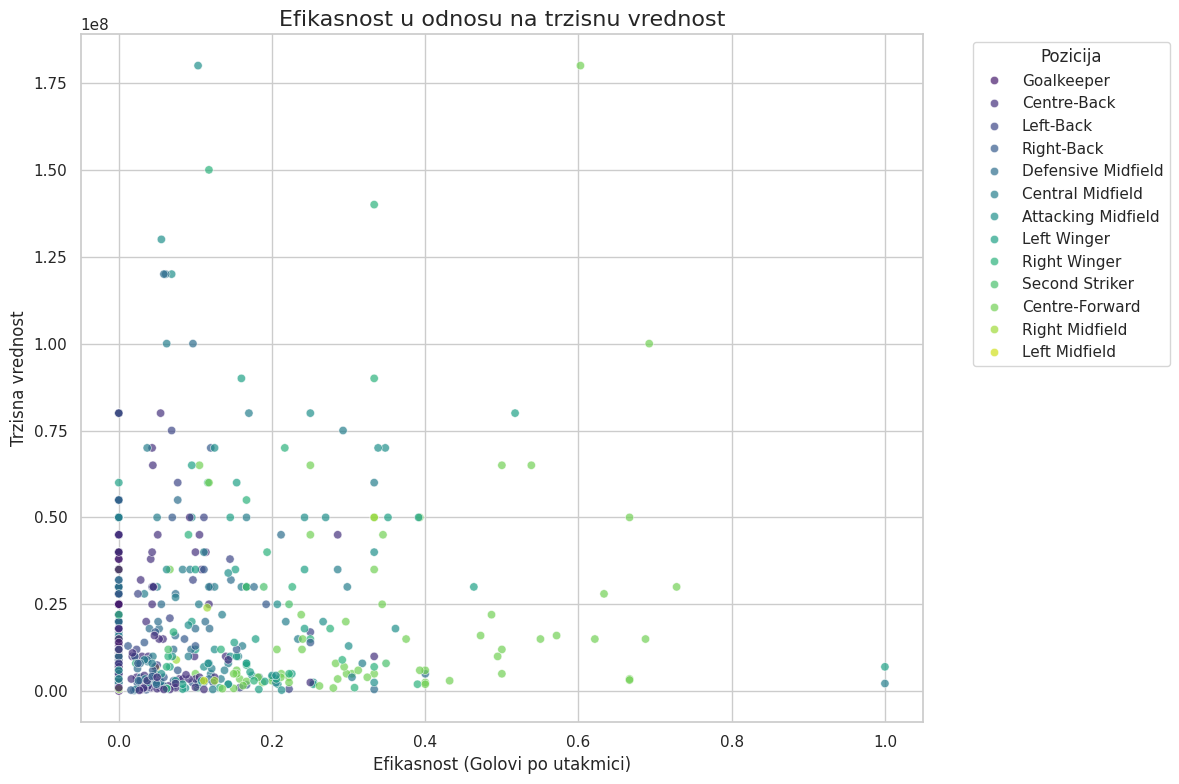

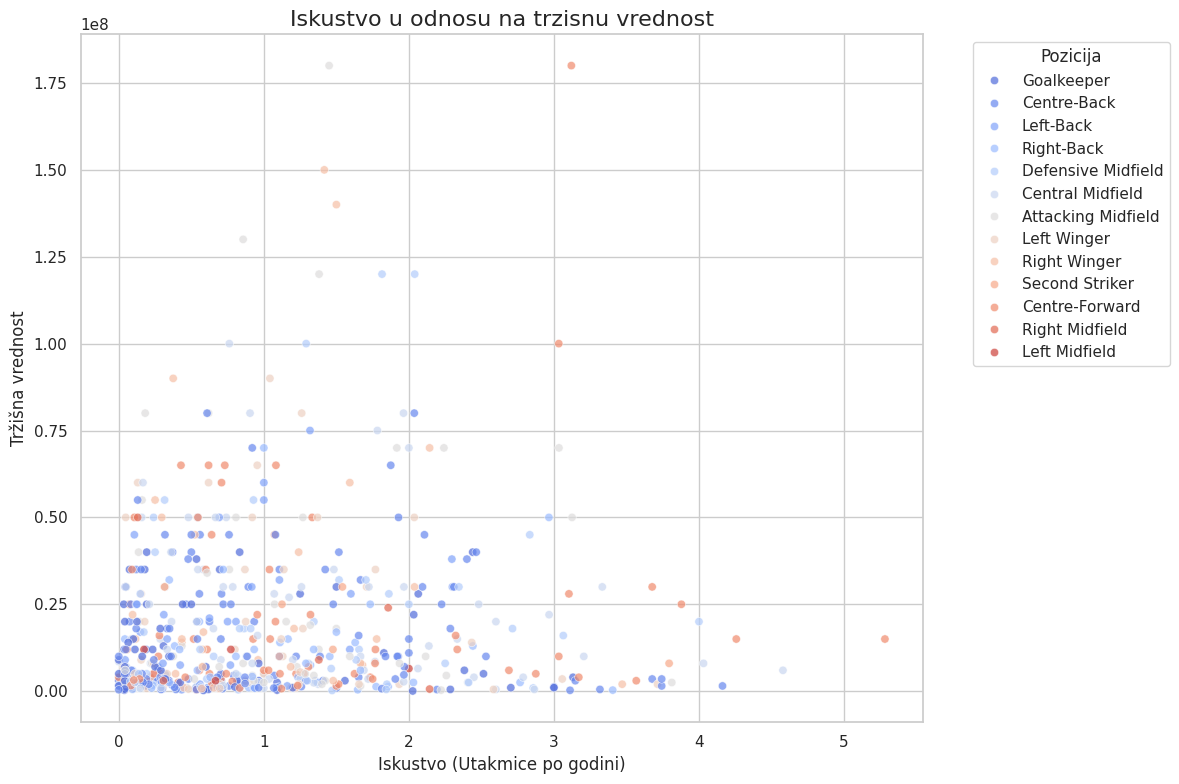

In [46]:
# Scatter plot: Efikasnost u odnosu na trzisnu vrednost
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='Efficiency', y='MarketValue', hue='Position', palette="viridis", alpha=0.7)
plt.title("Efikasnost u odnosu na trzisnu vrednost", fontsize=16)
plt.xlabel("Efikasnost (Golovi po utakmici)", fontsize=12)
plt.ylabel("Trzisna vrednost", fontsize=12)
plt.legend(title="Pozicija", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Scatter plot: Iskustvo u odnosu na trizisnu vrednost
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='Experience', y='MarketValue', hue='Position', palette="coolwarm", alpha=0.7)
plt.title("Iskustvo u odnosu na trzisnu vrednost", fontsize=16)
plt.xlabel("Iskustvo (Utakmice po godini)", fontsize=12)
plt.ylabel("Tržišna vrednost", fontsize=12)
plt.legend(title="Pozicija", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


podela na trening i test skup podataka

In [47]:
from sklearn.model_selection import train_test_split

# Odabir ciljne kolone i ulaznih karakteristika
target = 'MarketValue'
features = ['Age_Scaled', 'Height_Scaled', 'Caps_Scaled', 'Goals_Scaled', 'Efficiency', 'Experience']

X = df_cleaned[features]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Oblik trening skupa:", X_train.shape)
print("Oblik test skupa:", X_test.shape)


Oblik trening skupa: (493, 6)
Oblik test skupa: (124, 6)


In [48]:
nan_summary = X_train.isnull().sum()
print("Broj NaN vrednosti po kolonama u X:")
print(nan_summary)

# Popunjavanje NaN vrednosti sa 0
X_train = X_train.fillna(0)

print("Provera da li X sada sadrži NaN vrednosti:", X_train.isnull().sum().sum())

# Provera gde su NaN vrednosti
nan_summary = X_test.isnull().sum()
print("Broj NaN vrednosti po kolonama u X:")
print(nan_summary)

X_test = X_test.fillna(0)

print("Provera da li X sada sadrži NaN vrednosti:", X_test.isnull().sum().sum())


Broj NaN vrednosti po kolonama u X:
Age_Scaled       0
Height_Scaled    0
Caps_Scaled      0
Goals_Scaled     0
Efficiency       7
Experience       0
dtype: int64
Provera da li X sada sadrži NaN vrednosti: 0
Broj NaN vrednosti po kolonama u X:
Age_Scaled       0
Height_Scaled    0
Caps_Scaled      0
Goals_Scaled     0
Efficiency       2
Experience       0
dtype: int64
Provera da li X sada sadrži NaN vrednosti: 0


kod za model

Rezultati osnovnog modela:
Srednjekvadratna greska (MSE): 457393866443970.62
R2: 0.13


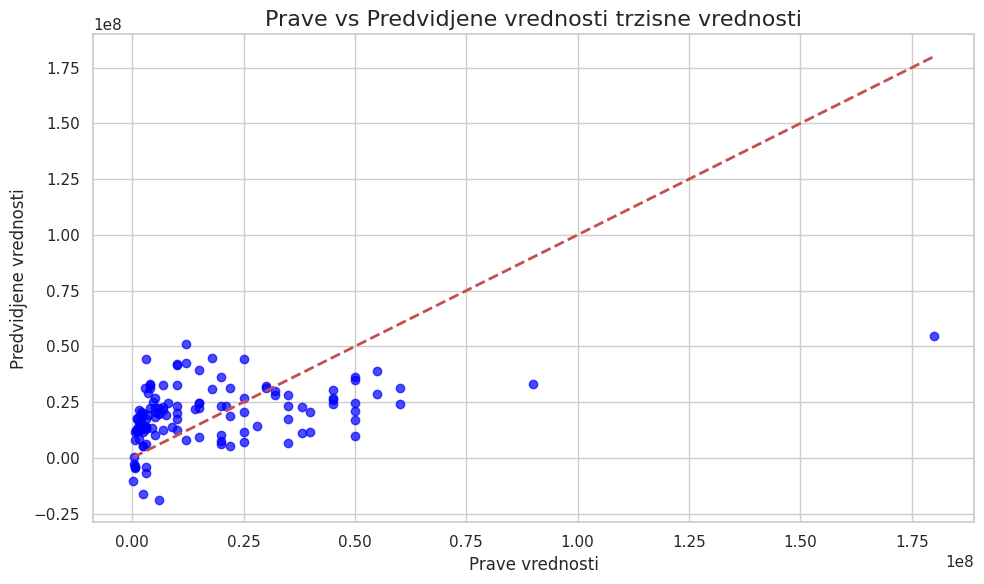

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predikcija na test skupu
y_pred = model.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Rezultati osnovnog modela:")
print(f"Srednjekvadratna greska (MSE): {mse:.2f}")
print(f"R2: {r2:.2f}")

# Prikaz pravih i predvidjenih vrednosti na scatter plotu
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Prave vs Predvidjene vrednosti trzisne vrednosti", fontsize=16)
plt.xlabel("Prave vrednosti", fontsize=12)
plt.ylabel("Predvidjene vrednosti", fontsize=12)
plt.tight_layout()
plt.show()


**Primena drugog modela npr random forest**

Rezultati Random Forest modela:
Srednjekvadratna greska(MSE): 508879393436379.94
R2: 0.04


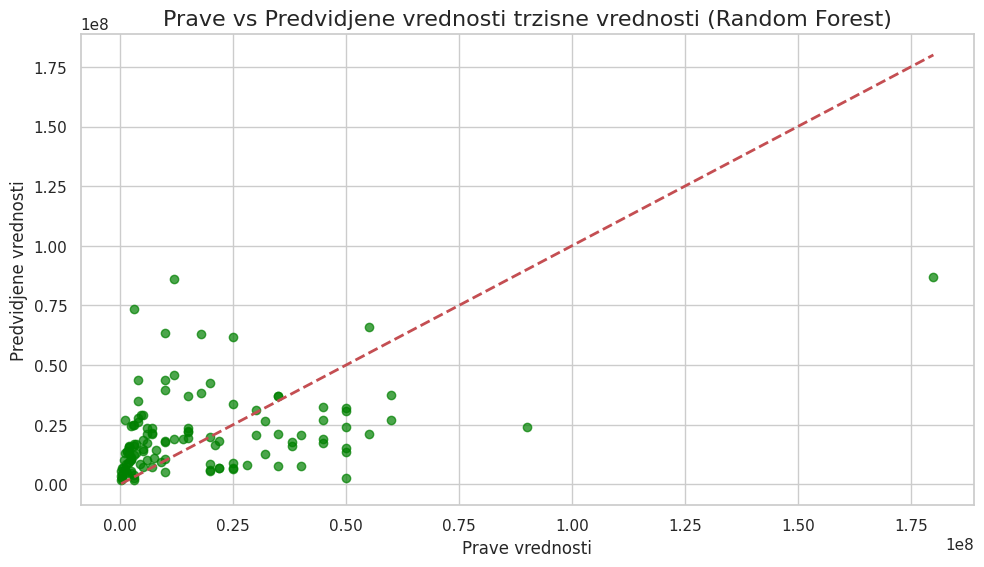

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluacija Random Forest modela
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Rezultati Random Forest modela:")
print(f"Srednjekvadratna greska(MSE): {mse_rf:.2f}")
print(f"R2: {r2_rf:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Prave vs Predvidjene vrednosti trzisne vrednosti (Random Forest)", fontsize=16)
plt.xlabel("Prave vrednosti", fontsize=12)
plt.ylabel("Predvidjene vrednosti", fontsize=12)
plt.tight_layout()
plt.show()


probacemo i model xgboost

Rezultati XGBoost modela:
Srednjekvadratna greska (MSE): 595224149622784.00
R2: -0.13


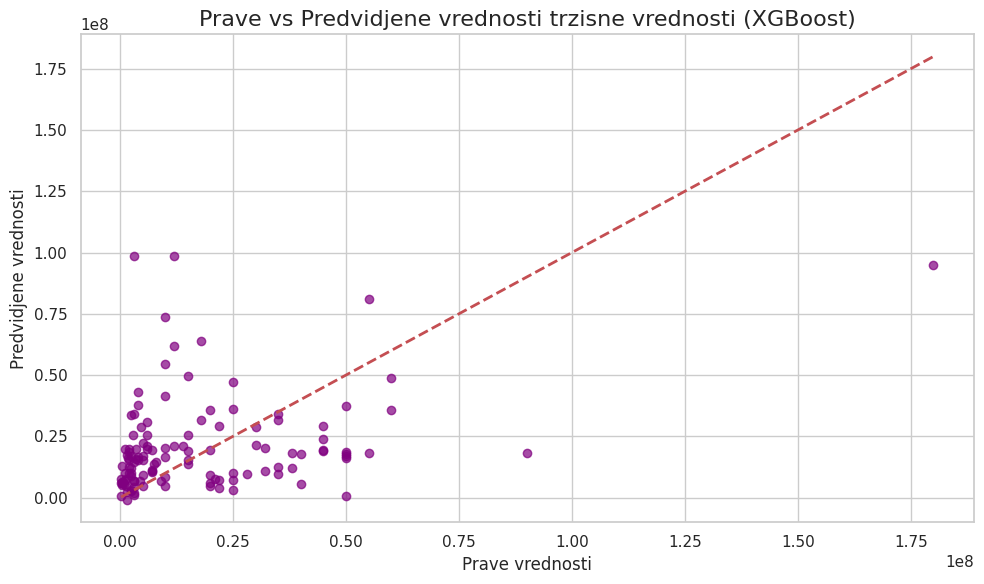

In [51]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluacija XGBoost modela
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Rezultati XGBoost modela:")
print(f"Srednjekvadratna greska (MSE): {mse_xgb:.2f}")
print(f"R2: {r2_xgb:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Prave vs Predvidjene vrednosti trzisne vrednosti (XGBoost)", fontsize=16)
plt.xlabel("Prave vrednosti", fontsize=12)
plt.ylabel("Predvidjene vrednosti", fontsize=12)
plt.tight_layout()
plt.show()


Transformacija ciljne vrednosti:

Primena log-transformacije na tržišnu vrednost kako bi se smanjio raspon vrednosti.


Rezultati XGBoost modela sa log-transformacijom:
Srednjekvadratna greska (MSE): 1.91
R2: 0.06


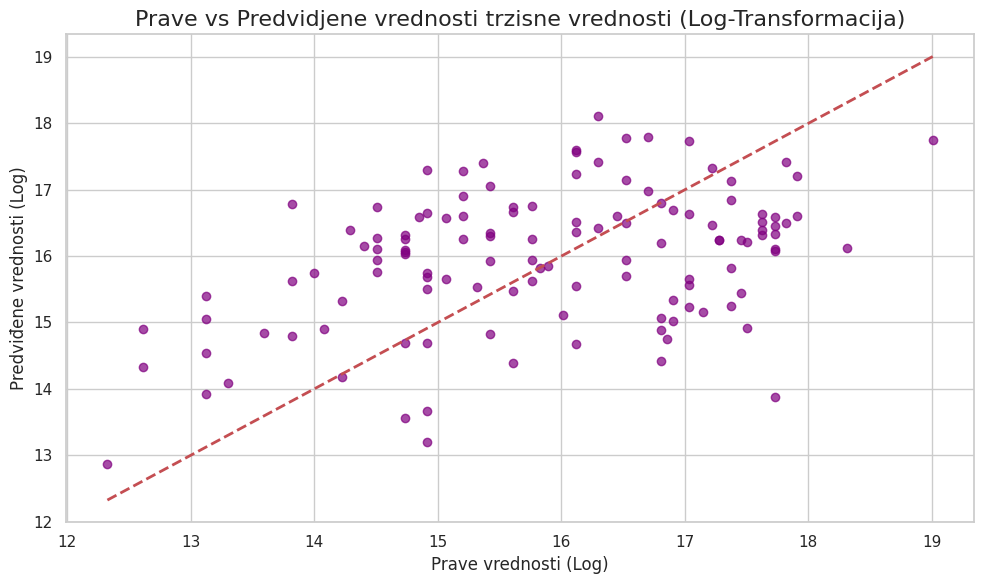

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Log-transformacija ciljne vrednosti (MarketValue)
df_cleaned['MarketValue_Log'] = np.log1p(df_cleaned['MarketValue'])

# Koristi log(1+x) za obradu 0 vrednosti

target_log = 'MarketValue_Log'

X_train, X_test, y_train, y_test = train_test_split(X, df_cleaned[target_log], test_size=0.2, random_state=42)

xgb_model_log = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model_log.fit(X_train, y_train)

y_pred_xgb_log = xgb_model_log.predict(X_test)

# Evaluacija XGBoost modela sa log-transformisanom ciljnim vrednostima
mse_xgb_log = mean_squared_error(y_test, y_pred_xgb_log)
r2_xgb_log = r2_score(y_test, y_pred_xgb_log)

print("Rezultati XGBoost modela sa log-transformacijom:")
print(f"Srednjekvadratna greska (MSE): {mse_xgb_log:.2f}")
print(f"R2: {r2_xgb_log:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb_log, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Prave vs Predvidjene vrednosti trzisne vrednosti (Log-Transformacija)", fontsize=16)
plt.xlabel("Prave vrednosti (Log)", fontsize=12)
plt.ylabel("Predviđene vrednosti (Log)", fontsize=12)
plt.tight_layout()
plt.show()


Optimizacija hiperparametara(ne radi)

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Definisanje opsega hiperparametara za XGBoost
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Kreiranje XGBoost modela
xgb_model = XGBRegressor(random_state=42, enable_categorical=False)

# Randomized Search sa unakrsnom validacijom
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,  # Broj slučajnih kombinacija koje se testiraju
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Najbolji parametri i rezultati
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Najbolji hiperparametri za XGBoost model:")
print(best_params)
print(f"Najbolji R-squared score tokom validacije: {best_score:.2f}")

# Testiranje najboljeg modela na test skupu
best_xgb_model = random_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluacija najboljeg modela
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print("Rezultati najboljeg XGBoost modela na test skupu:")
print(f"Mean Squared Error (MSE): {mse_best_xgb:.2f}")
print(f"R-squared (R2): {r2_best_xgb:.2f}")

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_xgb, alpha=0.7, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Prave vs Predviđene vrednosti (Optimizovani XGBoost)", fontsize=16)
plt.xlabel("Prave vrednosti (Log)", fontsize=12)
plt.ylabel("Predviđene vrednosti (Log)", fontsize=12)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'